<a href="https://colab.research.google.com/github/JASCRAJ/Sketch-literature/blob/main/010423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

def parse_svg(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    view_box = root.get('viewBox')
    view_box_values = view_box.split()
    svg_width = float(view_box_values[2])  # width is the third value
    svg_height = float(view_box_values[3])  # height is the fourth value
    # Extract width and height attributes from the SVG root element
    # svg_width = root.get('width')
    # svg_height = root.get('height')

    paths = []

    # Iterate through path elements
    for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data = path_elem.get('d')
        #stroke = path_elem.get('stroke')
        fill = path_elem.get('fill')
        #print(stroke)

        # Extract numeric values from path_data using the custom function
        numeric_values = extract_numeric_values(path_data)

        # Extract the second and third elements
        M_x = numeric_values[0] if len(numeric_values) > 1 else None
        M_y = numeric_values[1] if len(numeric_values) > 2 else None

        # Calculate the length of the path data
        path_length = len(path_data)

        paths.append({
            'path_data': path_data,
            'fill': fill,
            #'stroke': stroke,
            'X_value': M_x,
            'Y_value': M_y,
            'path_length': path_length  # Add path length to the dictionary
        })

    # Create DataFrame from paths list
    df = pd.DataFrame(paths)

    # Add width and height to the DataFrame
    df['width'] = svg_width
    df['height'] = svg_height

    # Sort DataFrame based on 'path_length' in descending order
    df.sort_values(by='path_length', ascending=False, inplace=True)

    return df

def save_to_csv(dataframe, csv_filename):
    dataframe.to_csv(csv_filename, index=False)

# Replace '/content/Laura_sketch_1 (12).svg' with the actual path to your SVG file
#svg_file_path = '/content/Munch-unnamed_sketch_1 (1).svg'
svg_file_path = '/content/street_line.svg'
# Parse SVG paths and create a DataFrame
df = parse_svg(svg_file_path)
print(len(df))
print(df.head(10))
#range = 700
range=8000
# Split DataFrame based on path_length condition
# subset_path_length_gt_2000 = df[df['path_length'] > range]
# subset_path_length_le_2000 = df[df['path_length'] <= range]
# Split DataFrame based on path_length condition
subset_path_length_gt_2000 = df.iloc[0:10]
subset_path_length_le_2000 = df.iloc[10:]

# Replace 'subset_path_length_gt_2000.csv' and 'subset_path_length_le_2000.csv' with desired filenames
save_to_csv(subset_path_length_gt_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/street_line-subset_path_length_gt_2000.csv')
save_to_csv(subset_path_length_le_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/street_line-subset_path_length_lt_2000.csv')


7933
                                              path_data     fill X_value  \
0        M 0.00 0.00   L 1160.00 0.00   L 1160.00 15...  #fefefe    0.00   
3218     M 608.27 858.66   L 621.68 862.68   Q 621.9...  #fefefe  608.27   
5540     M 376.55 1134.94   Q 381.31 1135.57 386.10 ...  #0c0d0d  376.55   
4123     M 153.48 977.94   Q 152.24 978.15 151.66 97...  #fefefe  153.48   
584      M 180.83 438.33   Q 180.65 438.89 180.77 43...  #0c0d0d  180.83   
3504     M 925.41 889.53   L 925.66 889.87   Q 925.8...  #0c0d0d  925.41   
3820     M 335.99 933.78   Q 336.90 934.43 338.25 93...  #0c0d0d  335.99   
1991     M 165.20 650.97   Q 165.01 652.02 165.25 65...  #0c0d0d  165.20   
2503     M 762.03 796.30   Q 761.89 797.06 760.73 79...  #0c0d0d  762.03   
6330     M 97.87 1203.75   L 97.95 1207.63   L 98.24...  #0c0d0d   97.87   

      Y_value  path_length   width  height  
0        0.00      1661794  1160.0  1536.0  
3218   858.66       240567  1160.0  1536.0  
5540  1134.94       168

In [ ]:
common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
File_name = 'street_line'
#dist = int(df['width'][0]/2)
dist=100

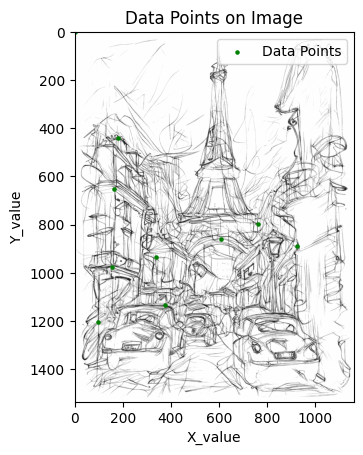

                                           path_data     fill  X_value  \
0     M 0.00 0.00   L 1160.00 0.00   L 1160.00 15...  #fefefe     0.00   
1     M 608.27 858.66   L 621.68 862.68   Q 621.9...  #fefefe   608.27   
2     M 376.55 1134.94   Q 381.31 1135.57 386.10 ...  #0c0d0d   376.55   
3     M 153.48 977.94   Q 152.24 978.15 151.66 97...  #fefefe   153.48   
4     M 180.83 438.33   Q 180.65 438.89 180.77 43...  #0c0d0d   180.83   

   Y_value  path_length   width  height  
0     0.00      1661794  1160.0  1536.0  
1   858.66       240567  1160.0  1536.0  
2  1134.94       168514  1160.0  1536.0  
3   977.94       164289  1160.0  1536.0  
4   438.33       159376  1160.0  1536.0  


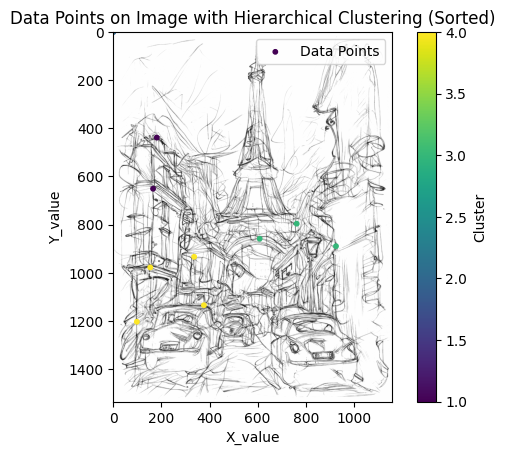

Number of clusters: 4


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg


def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=5)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
    df = pd.read_csv(csv_file_path)
    print(df.head())
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    view_box = root.get('viewBox')
    view_box_values = view_box.split()
    svg_width = float(view_box_values[2])  # width is the third value
    svg_height = float(view_box_values[3])
    width = svg_width#root.attrib.get('width')
    height = svg_height#root.attrib.get('height')
    return width, height

def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content += f'<rect width="{width}" height="{height}" fill="white"/>\n'
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        stroke = group['fill'].tolist()
        #print(stroke)

        svg_content = ''

        for path_data, color in zip(paths_data, stroke):
            svg_content += f'<path d="{path_data}" fill="{color}" />\n'
            #svg_content += f'<path d="{path_data}" stroke="{color}" fill="{"none"}" stroke-width="{"1.00"}" vector-effect="{"non-scaling-stroke"}"/>\n'

        cumulative_svg_content += svg_content

        svg_file_path_cluster = os.path.join(output_dir_svg, f'accumulated_clusters_1_{cluster}.svg')
        with open(svg_file_path_cluster, 'w') as f:
            f.write(cumulative_svg_content + '</svg>')

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_1_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path_cluster, write_to=png_file_path)

    return cumulative_svg_content


# def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
#     os.makedirs(output_dir_svg, exist_ok=True)
#     os.makedirs(output_dir_png, exist_ok=True)
#     width, height = get_svg_width_height(svg_file_path)
#     cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
#     grouped_clusters = df_sorted.groupby('Cluster')

#     for cluster, group in grouped_clusters:
#         paths_data = group['path_data'].tolist()
#         #styles = group['style'].tolist()
#         stroke = group['stroke'].tolist()
#         print(stroke)

#         svg_content = ''

#         for path_data, style in zip(paths_data, stroke):
#             #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'
#             svg_content += f'<path d="{path_data}" stroke="{stroke}" />\n'
#             print(svg_content)
#             #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

#         cumulative_svg_content += svg_content
#         f_content_gt = cumulative_svg_content + '</svg>'

#         svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_1_{cluster}.svg')
#         with open(svg_file_path, 'w') as f:
#             f.write(f_content_gt)

#         png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_1_{cluster}.png')
#         cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)
#     return cumulative_svg_content
    #print(cumulative_svg_content)

# Example usage:
# Define common path
# common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
# File_name = 'Munch-unnamed_sketch_1'

# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_gt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
p_data = save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#print(p_data)
#save_svg_and_png_files(df_sorted, svg_output_dir)


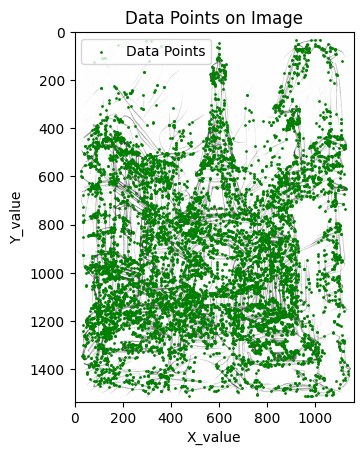

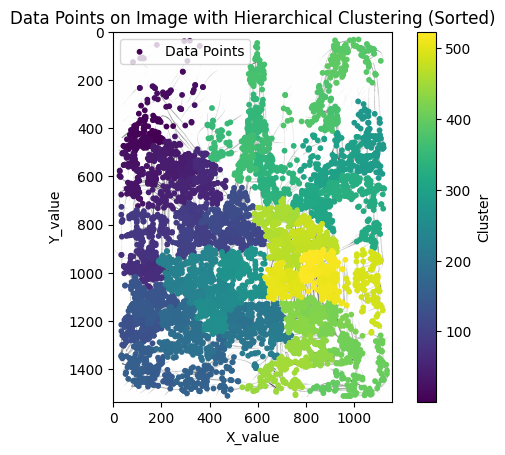

Number of clusters: 523
                                              path_data     fill  X_value  \
2640     M 179.15 423.05   Q 177.61 422.72 176.94 42...  #2b2a2b   179.15   
2045     M 173.18 413.13   Q 173.88 409.08 174.41 40...  #4e4b4c   173.18   
707      M 177.31 417.20   L 177.65 416.91   Q 178.4...  #2b2a2b   177.31   
5542     M 183.76 421.95   Q 184.17 421.79 184.45 42...  #0c0d0d   183.76   
6969     M 182.11 417.38   Q 182.34 417.44 182.12 41...  #2b2a2b   182.11   
...                                                 ...      ...      ...   
6614     M 830.64 945.91   Q 831.89 945.76 832.26 94...  #2b2a2b   830.64   
7786     M 814.56 955.98   L 814.14 961.94   Q 814.0...  #9e9c9b   814.56   
7790     M 816.29 964.06   Q 817.47 965.31 816.91 96...  #9e9c9b   816.29   
4693     M 847.15 952.89   Q 847.89 951.53 848.56 95...  #4e4b4c   847.15   
282      M 820.34 960.48   Q 820.54 961.32 819.87 96...  #fefefe   820.34   

      Y_value  path_length   width  height  Cluster

NameError: name 'svg_file_path' is not defined

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg



def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=1)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
    df = pd.read_csv(csv_file_path)
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

import numpy as np

# def hierarchical_clustering_center_first(csv_file_path, image_file_path, max_distance=dist):
#     # Read data from CSV
#     df = pd.read_csv(csv_file_path)

#     # Calculate center point
#     center_x = df['X_value'].mean()
#     center_y = df['Y_value'].mean()

#     # Calculate distances from center
#     df['Distance'] = np.sqrt((df['X_value'] - center_x)**2 + (df['Y_value'] - center_y)**2)

#     # Sort data by distance from center
#     df_sorted = df.sort_values(by='Distance')

#     # Perform hierarchical clustering
#     distances = pdist(df_sorted[['X_value', 'Y_value']])
#     linkage_matrix = linkage(distances, method='ward')
#     clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

#     # Assign clusters to DataFrame
#     df_sorted['Cluster'] = clusters

#     # Visualize clustered data
#     img = mpimg.imread(image_file_path)
#     plt.imshow(img, cmap='gray')
#     plt.scatter(clusters['X_value'], clusters['Y_value'], c=clusters['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
#     plt.title('Data Points on Image with Hierarchical Clustering (Center First)')
#     plt.xlabel('X_value')
#     plt.ylabel('Y_value')
#     plt.colorbar(label='Cluster')
#     plt.legend()
#     plt.show()

#     # Print number of clusters
#     num_clusters = len(set(clusters))
#     print("Number of clusters:", num_clusters)

#     return df_sorted


def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    view_box = root.get('viewBox')
    view_box_values = view_box.split()
    svg_width = float(view_box_values[2])  # width is the third value
    svg_height = float(view_box_values[3])
    width = svg_width#root.attrib.get('width')
    height = svg_height#root.attrib.get('height')
    return width, height

def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    #cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content = p_data
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        fill = group['fill'].tolist()


        svg_content = ''
        for path_data, color in zip(paths_data, fill):
            svg_content += f'<path d="{path_data}" fill="{color}" />\n'
            #svg_content += f'<path d="{path_data}" stroke="{color}" fill="{"none"}" stroke-width="{"1.00"}" vector-effect="{"non-scaling-stroke"}"/>\n'

        # for path_data, style in zip(paths_data, stroke):
        #     svg_content += f'<path d="{path_data}" style="{stroke}" />\n'
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

        cumulative_svg_content += svg_content
        f_content = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_2_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_2_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)




# Example usage:
# Define common path


# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_lt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted_lt.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files_lt')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
print(df_sorted)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#save_svg_and_png_files(df_sorted, svg_output_dir)


In [ ]:
# from PIL import Image
# import os

# # Path to the directory containing PNG images
# input_dir = "/content/drive/MyDrive/060224_input/160224/Munch_download_/000000577862png_files"

# # List all PNG files in the directory
# png_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]

# # Sort files to ensure they are in the correct order
# png_files.sort()

# # Create a list to store the images
# images = []

# # Loop through each PNG file and append it to the images list
# for png_file in png_files:
#     image_path = os.path.join(input_dir, png_file)
#     image = Image.open(image_path)
#     images.append(image)

# # Save the images as a GIF
# output_gif_path = "/content/000000577862_1.gif"
# images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)


In [ ]:
import os
import re
from PIL import Image

def generate_gif(input_folder, output_gif, duration):
    # Get list of image files in the input folder
    images = [img for img in os.listdir(input_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort images based on filename (assuming filenames are numbered)
    images.sort(key=lambda x: int(re.search(r'\d+', x).group()))

    # Open each image and append it to frames list
    frames = []
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        frames.append(Image.open(image_path))

    # Save frames as GIF with specified duration between frames
    frames[0].save(output_gif, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)

    print("GIF generated successfully.")

# Example usage
input_folder = png_output_dir#"/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_masterpng_files"
output_gif = File_name+".gif"
duration = 300  # in milliseconds (3 seconds)
generate_gif(input_folder, output_gif, duration)


GIF generated successfully.


In [ ]:
import cv2
import os

# Path to the directory containing PNG images
input_dir = png_output_dir#"/content/drive/MyDrive/060224_input/160224/Munch_download_/000000577862png_files"

# List all PNG files in the directory
png_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]

# Sort files to ensure they are in the correct order
png_files.sort()

# Read the first image to get dimensions
first_image_path = os.path.join(input_dir, png_files[0])
first_image = cv2.imread(first_image_path)
height, width, _ = first_image.shape

# Define the codec and create VideoWriter object
output_video_path = File_name+".mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 5.0, (width, height))

# Loop through each PNG file and write it to the video
for png_file in png_files:
    image_path = os.path.join(input_dir, png_file)
    frame = cv2.imread(image_path)
    out.write(frame)

# Release the VideoWriter and close all windows
out.release()
cv2.destroyAllWindows()

print("Video created successfully at:", output_video_path)


Video created successfully at: AAAI_dog_line_vect.mp4


In [ ]:
!pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.3 MB/s eta 0:00:00
